# Multi-Asset Statistical Arbitrage Backtesting Engine

## Objective
This project builds a modular backtesting engine for
statistical arbitrage strategies across equities, ETFs, and FX.

The goal is not to maximize historical Sharpe, but to demonstrate:
- Trading intuition
- Statistical rigor
- Risk-aware system design
- Institutional-grade engineering practices

## Why This Project Exists

Most student trading projects:
- Mix research and execution logic
- Ignore transaction costs
- Use unrealistic assumptions
- Cannot scale beyond a single notebook

This project is explicitly designed to mirror how
systematic trading strategies are researched, validated,
and risk-managed in professional trading environments.

## High-Level System Architecture

Market Data
→ Research Layer (offline, slow, exploratory)
→ Signal Generation (deterministic, rule-based)
→ Portfolio Construction (capital allocation)
→ Execution Simulation (costs, slippage)
→ Risk Management (stops, exposure limits)
→ Performance Evaluation

Each component is isolated to prevent:
- Look-ahead bias
- Research leakage
- Overfitting

## Research vs Production Code Separation

Research notebooks are used only to:
- Explore data
- Test hypotheses
- Visualize distributions

All trading logic lives in Python modules
that can be unit-tested and reused.

---

# Phase 1: System Design & Architecture

## Objective

The goal of Phase 1 is to design a **backtesting system architecture** 
that separates research from execution, ensures reproducibility, and reflects statistical arbitrage strategies are engineered.

By the end of this phase, the following should be understood:
- The overall pipeline and module responsibilities
- How configuration and logging are handled
- How the backtest engine interfaces are structured

## Why Phase 1 Matters

In backtesting:

- Research code and execution code are **strictly separated**
- Parameters and settings are centralized for reproducibility
- Logging and modularity are essential to scale
- Early architecture decisions prevent **look-ahead bias** and overfitting

This phase does **not yet produce trading signals**, but it establishes the foundation
for robust, production-grade backtesting.

## Configuration & Logging

- `config/settings.py` centralizes parameters:
    - Backtest period
    - Initial capital
    - Execution costs
    - Risk limits

- `utils/logging.py` ensures all events, signals, and errors are logged
    - Allows debugging and traceability

In [ ]:
# Load Config
import importlib.util
from pathlib import Path

# Path to settings.py
settings_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\config\settings.py") # Change accordingly

# Load the module dynamically
spec = importlib.util.spec_from_file_location("settings", settings_path)
settings = importlib.util.module_from_spec(spec)
spec.loader.exec_module(settings)

# Now get BacktestConfig
BacktestConfig = settings.BacktestConfig
config = BacktestConfig()
print(config)

BacktestConfig(start_date='2017-01-01', end_date='2026-01-01', initial_capital=1000000, base_currency='USD')


In [ ]:
# Test Logging
import importlib.util
from pathlib import Path

# Path to logging.py
logging_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\utils\logging.py") # Change accordingly

# Load the module dynamically
spec = importlib.util.spec_from_file_location("logging_module", logging_path)
logging_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(logging_module)

# Use the function
get_logger = logging_module.get_logger
logger = get_logger("phase1_test")
logger.info("Phase 1 notebook initialized successfully.")
print("Check logs/phase1_test.log for output.")

Check logs/phase1_test.log for output.


## Backtest Engine Skeleton

`backtest/engine.py` defines the main interface for the backtesting engine:

- Accepts data handler, signal generator, portfolio, execution, and risk modules
- Defines a `run()` method for the main loop
- At this phase, the loop is not implemented (interface only)

This ensures **modularity and professional design** before adding trading logic.


In [ ]:
# Instantiate Skeleton Engine
import importlib.util
from pathlib import Path

# Path to engine.py
engine_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\backtest\engine.py")

# Load the module dynamically
spec = importlib.util.spec_from_file_location("engine_module", engine_path)
engine_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(engine_module)

# Get the BacktestEngine class
BacktestEngine = engine_module.BacktestEngine

# Instantiate and run
try:
    engine = BacktestEngine(
        data_handler=None,
        signal_generator=None,
        portfolio=None,
        execution_model=None,
        risk_manager=None
    )
    engine.run()
except NotImplementedError as e:
    print(f"Expected NotImplementedError: {e}")


Expected NotImplementedError: Backtest loop implemented in later phase.


## Phase 1 Summary

- Project structure and folder layout established
- Configuration and logging implemented
- Backtest engine skeleton defines interfaces for future phases
---

# Phase 2: Data Engineering & Asset Universe

## Objective

The goal of Phase 2 is to create a **robust, scalable dataset** 
for multi-asset statistical arbitrage research.

By the end of this phase, the following should be understood:
- How we define a realistic asset universe
- How raw market data is fetched, cleaned, and aligned
- How multi-asset time series are prepared for backtesting

## Why Phase 2 Matters

Data quality is **critical in quantitative trading**:

- Bad or misaligned data leads to **inflated backtest performance**
- Multi-asset alignment ensures **no look-ahead bias**
- Preprocessing and caching improves **scalability** for datasets with many rows
- Proper universe selection ensures **trading capacity and liquidity**

This phase sets the foundation for **pair selection and signal generation**.

## Asset Universe Design

We construct a realistic, tradable universe:

| Asset Class | Tickers / Examples                   | Notes |
|------------|-------------------------------------|-------|
| Equities   | AAPL, MSFT, GOOG, AMZN, TSLA        | Top liquidity S&P500 names |
| ETFs       | XLK, XLF, XLE, XLY, XLV             | Sector ETFs with >5yr history |
| FX         | EUR/USD, USD/JPY, GBP/USD           | G10 daily FX pairs |

Key considerations:
- Liquidity and trading history
- Avoiding assets with missing data
- Representative of different sectors / asset classes

## Data Engineering Pipeline

1. **Fetch raw data** using free APIs (Yahoo Finance, Stooq, FRED)
2. **Clean data**:
   - Forward/backward fill missing values
   - Winsorize extreme daily returns
   - Adjust for corporate actions (splits, dividends)
3. **Align multiple assets** across different calendars
4. **Cache processed data** for reproducibility

In [ ]:
# Fetch Asset Universe and Raw Data
import importlib.util
from pathlib import Path

# Load universe.py 
universe_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\data\universe.py")
spec_universe = importlib.util.spec_from_file_location("universe_module", universe_path)
universe_module = importlib.util.module_from_spec(spec_universe)
spec_universe.loader.exec_module(universe_module)
get_universe = universe_module.get_universe

# Load fetch.py 
fetch_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\data\fetch.py")
spec_fetch = importlib.util.spec_from_file_location("fetch_module", fetch_path)
fetch_module = importlib.util.module_from_spec(spec_fetch)
spec_fetch.loader.exec_module(fetch_module)
fetch_yahoo = fetch_module.fetch_yahoo

# Functions to get asset universe
universe = get_universe()
equities = universe["equities"]
etfs = universe["etfs"]

# Fetch equities
prices_raw = fetch_yahoo(equities)
print(prices_raw.head())

[*********************100%***********************]  5 of 5 completed

Ticker           AAPL       AMZN       GOOG       MSFT       TSLA
Date                                                             
2017-01-03  26.770885  37.683498  39.014381  56.299320  14.466000
2017-01-04  26.740919  37.859001  39.052109  56.047421  15.132667
2017-01-05  26.876907  39.022499  39.405453  56.047421  15.116667
2017-01-06  27.176537  39.799500  40.007435  56.533211  15.267333
2017-01-09  27.425461  39.846001  40.032253  56.353302  15.418667


## Cleaning Data

- Fill missing values (forward/backward)
- Winsorize extreme returns to remove noise
- Reconstruct clean price series from returns

This prevents **spurious signals** that inflate Sharpe ratios.

In [ ]:
# Clean Data
import importlib.util
from pathlib import Path

# Path to clean.py
clean_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\data\clean.py")

# Load the module dynamically
spec_clean = importlib.util.spec_from_file_location("clean_module", clean_path)
clean_module = importlib.util.module_from_spec(spec_clean)
spec_clean.loader.exec_module(clean_module)

# Get the function
clean_prices = clean_module.clean_prices

# Fetch clean prices
prices_clean = clean_prices()
print(prices_clean.head())

                AAPL      AMZN      GOOG      MSFT      TSLA
Date                                                        
2017-01-03       NaN       NaN       NaN       NaN       NaN
2017-01-04  0.998881  1.004657  1.000967  0.995526  1.046085
2017-01-05  1.003960  1.035533  1.010024  0.995526  1.044979
2017-01-06  1.015153  1.056152  1.025454  1.004154  1.055394
2017-01-09  1.024451  1.057386  1.026090  1.000959  1.065856


## Aligning Multi-Asset Data

- Ensure all assets share the **same trading calendar**
- Forward/backward fill missing values after merge
- Resulting `aligned_prices` ready for vectorized backtesting

In [ ]:
# Align Multi-Asset Data
import importlib.util
from pathlib import Path

# Path to align.py
align_path = Path(r"C:\PATH\Multi-Asset Statistical Arbitrage Backtesting Engine\main\data\align.py")

# Load the module dynamically
spec_align = importlib.util.spec_from_file_location("align_module", align_path)
align_module = importlib.util.module_from_spec(spec_align)
spec_align.loader.exec_module(align_module)

# Get the function
align_assets = align_module.align_assets

# Fetch aligned prices
aligned_prices = align_assets()
print(aligned_prices.head())

                AAPL      AMZN      GOOG      MSFT      TSLA
Date                                                        
2017-01-03  0.998881  1.004657  1.000967  0.995526  1.046085
2017-01-04  0.998881  1.004657  1.000967  0.995526  1.046085
2017-01-05  1.003960  1.035533  1.010024  0.995526  1.044979
2017-01-06  1.015153  1.056152  1.025454  1.004154  1.055394
2017-01-09  1.024451  1.057386  1.026090  1.000959  1.065856


## Exploratory Data Checks

- Compute daily returns
- Check mean, standard deviation, and missing values
- Visualize a few sample price series

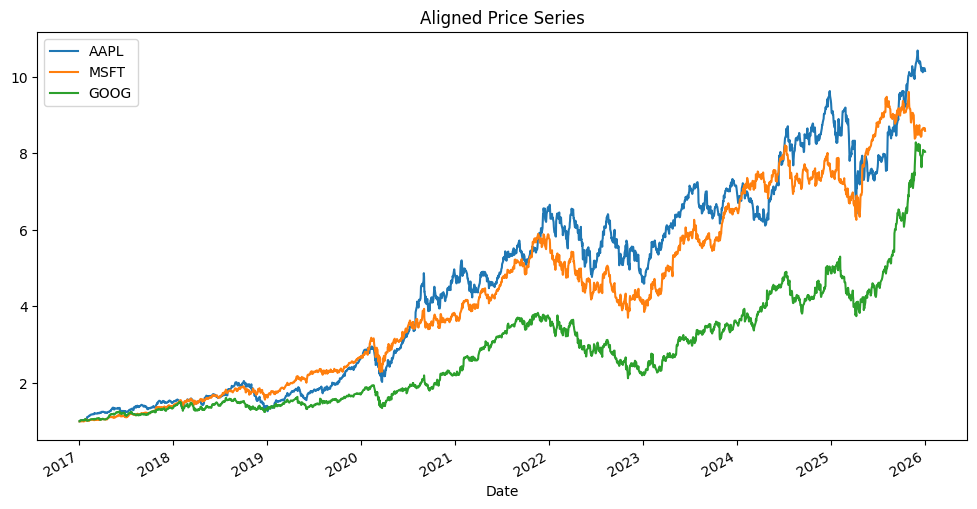

In [ ]:
import matplotlib.pyplot as plt

returns = aligned_prices.pct_change().dropna()

# Summary statistics
returns.describe().T[["mean", "std"]]

# Sample plot for 3 random assets
aligned_prices[["AAPL","MSFT","GOOG"]].plot(figsize=(12,6), title="Aligned Price Series")
plt.show()

## Phase 2 Summary

- Defined a realistic, multi-asset trading universe
- Fetched, cleaned, and aligned data from free APIs
- Prepared vectorized-ready time series for research
---